In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

/var/folders/92/fsnyg0n57cx169y7qtzjg3_w0000gn/T/ipykernel_36690/1114361887.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:


api_key = 'klHRkURJrqCrXMZEtjPoSWwckiYazQFS'
url = 'https://apps-st.fisheries.noaa.gov/ods/foss/trade_data/'

query = '''{
    "year":{"$gt": 2006}, 
    "name":{"$like":"%GROUNDFISH%"}, 
    "custom_district_name":{"$like":"%PORTLAND%"}, 
    "continent":{"$like":"%EU%"}
}'''

params = {
    'api_key': api_key,
    'q': query,
    'limit': 9999, 
    'offset': 0,
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print('Failed to fetch data:', response.status_code, response.text)

{'items': [{'year': '2007', 'month': '06', 'hts_number': '0305510000', 'name': 'GROUNDFISH COD NSPF DRIED', 'fus_group_code1': 'K1', 'fus_group_code2': '3012', 'fus_group1': 'CURED, DRIED, FISH', 'fus_group2': 'COD', 'cntry_code': '4039', 'cntry_name': 'NORWAY', 'continent': 'EUROPE', 'fao': '578', 'custom_district_code': '01', 'custom_district_name': 'PORTLAND, ME', 'edible_code': 'E', 'kilos': 75, 'val': 2632, 'source': 'IMP', 'association': 'CCAMLR, EFTA, ICCAT, NAFO, OECD', 'rfmo': 'CCAMLR, NAFO', 'nmfs_region_code': 'NE', 'links': [{'rel': 'self', 'href': 'https://apps-st.fisheries.noaa.gov/ods/foss/trade_data/AACKvDABTAAAItUAAO'}]}, {'year': '2007', 'month': '04', 'hts_number': '0304292011', 'name': 'GROUNDFISH COD ATLANTIC FILLET BLOCKS FROZEN > 4.5KG', 'fus_group_code1': 'C3', 'fus_group_code2': '0314', 'fus_group1': 'F/F, BLOCKS, GROUNDFISH', 'fus_group2': 'COD', 'cntry_code': '4550', 'cntry_name': 'POLAND', 'continent': 'EUROPE', 'fao': '616', 'custom_district_code': '01', 'c

In [3]:
df = pd.json_normalize(data['items'])
df

,year,month,hts_number,name,fus_group_code1,fus_group_code2,fus_group1,fus_group2,cntry_code,cntry_name,...,custom_district_code,custom_district_name,edible_code,kilos,val,source,association,rfmo,nmfs_region_code,links
0,2007,06,0305510000,GROUNDFISH COD NSPF DRIED,K1,3012,"CURED, DRIED, FISH",COD,4039,NORWAY,...,01,"PORTLAND, ME",E,75,2632,IMP,"CCAMLR, EFTA, ICCAT, NAFO, OECD","CCAMLR, NAFO",NE,"[{'rel': 'self', 'href': 'https://apps-st.fish..."
1,2007,04,0304292011,GROUNDFISH COD ATLANTIC FILLET BLOCKS FROZEN >...,C3,0314,"F/F, BLOCKS, GROUNDFISH",COD,4550,POLAND,...,01,"PORTLAND, ME",E,4101,22327,IMP,"CCAMLR, EU, OECD",CCAMLR,NE,"[{'rel': 'self', 'href': 'https://apps-st.fish..."
2,2007,01,0305510000,GROUNDFISH COD NSPF DRIED,K1,3012,"CURED, DRIED, FISH",COD,4039,NORWAY,...,01,"PORTLAND, ME",E,9315,175534,IMP,"CCAMLR, EFTA, ICCAT, NAFO, OECD","CCAMLR, NAFO",NE,"[{'rel': 'self', 'href': 'https://apps-st.fish..."
3,2007,04,0305510000,GROUNDFISH COD NSPF DRIED,K1,3012,"CURED, DRIED, FISH",COD,4039,NORWAY,...,01,"PORTLAND, ME",E,585,11738,IMP,"CCAMLR, EFTA, ICCAT, NAFO, OECD","CCAMLR, NAFO",NE,"[{'rel': 'self', 'href': 'https://apps-st.fish..."
4,2007,11,0305306030,GROUNDFISH COD NSPF FILLET DRIED/SALTED/BRINE ...,K2,4007,"CURED, PICKLED, FISH",COD,4039,NORWAY,...,01,"PORTLAND, ME",E,340,4834,IMP,"CCAMLR, EFTA, ICCAT, NAFO, OECD","CCAMLR, NAFO",NE,"[{'rel': 'self', 'href': 'https://apps-st.fish..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,2013,08,0304720000,GROUNDFISH HADDOCK FILLET FROZEN,E3,0524,"F/F, FILLET/STEAK, GROUNDFISH",HADDOCK,4120,UNITED KINGDOM,...,01,"PORTLAND, ME",E,49532,361670,REX,"CCAMLR, EU, ICCAT, OECD",CCAMLR,NE,"[{'rel': 'self', 'href': 'https://apps-st.fish..."
2567,2020,05,0303630000,GROUNDFISH COD NSPF FROZEN,B2,0127,"F/F, WHOLE, GROUNDFISH",COD,4280,GERMANY,...,01,"PORTLAND, ME",E,158618,367180,REX,"CCAMLR, EU, OECD",CCAMLR,NE,"[{'rel': 'self', 'href': 'https://apps-st.fish..."
2568,2020,06,0303630000,GROUNDFISH COD NSPF FROZEN,B2,0127,"F/F, WHOLE, GROUNDFISH",COD,4280,GERMANY,...,01,"PORTLAND, ME",E,158618,367180,REX,"CCAMLR, EU, OECD",CCAMLR,NE,"[{'rel': 'self', 'href': 'https://apps-st.fish..."
2569,2016,03,0304710000,GROUNDFISH COD NSPF FILLET FROZEN,E3,0519,"F/F, FILLET/STEAK, GROUNDFISH",COD,4039,NORWAY,...,01,"PORTLAND, ME",E,33715,156089,REX,"CCAMLR, EFTA, ICCAT, NAFO, OECD","CCAMLR, NAFO",NE,"[{'rel': 'self', 'href': 'https://apps-st.fish..."


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  2571 non-null   object
 1   month                 2571 non-null   object
 2   hts_number            2571 non-null   object
 3   name                  2571 non-null   object
 4   fus_group_code1       2571 non-null   object
 5   fus_group_code2       2571 non-null   object
 6   fus_group1            2571 non-null   object
 7   fus_group2            2571 non-null   object
 8   cntry_code            2571 non-null   object
 9   cntry_name            2571 non-null   object
 10  continent             2571 non-null   object
 11  fao                   2569 non-null   object
 12  custom_district_code  2571 non-null   object
 13  custom_district_name  2571 non-null   object
 14  edible_code           2571 non-null   object
 15  kilos                 2571 non-null   

In [5]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format='%Y-%m')




In [6]:
country_names = df['cntry_name'].unique()
country_names

array(['NORWAY', 'POLAND', 'FAROE IS.', 'RUSSIAN FEDERATION', 'ICELAND',
       'FRANCE', 'GREENLAND', 'DENMARK', 'NETHERLANDS', 'SWEDEN',
       'UNITED KINGDOM', 'GERMANY', 'PORTUGAL', 'LATVIA', 'IRELAND',
       'SPAIN', 'SERBIA & KOSOVO', 'UKRAINE', 'BULGARIA', 'ROMANIA',
       'LITHUANIA', 'BOSNIA-HERCEGOVINA', 'GREECE', 'CROATIA',
       'MONTENEGRO', 'ITALY', 'ALBANIA'], dtype=object)

In [7]:
fish_names = df['fus_group2'].unique()
fish_names

array(['COD', 'CUSK, HADDOCK', 'POLLOCK', 'HADDOCK', 'UNCLASSIFIED',
       'COD, CUSK, HADDOCK, HAKE, POLLOCK', 'OCEAN PERCH', 'OTHER',
       'CUSK', 'BLUE WHITING', 'GROUNDFISH', 'HAKE, WHITING', 'SURIMI',
       'HAKE'], dtype=object)

/Users/mikey/miniconda3/envs/ds5110_env/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mikey/miniconda3/envs/ds5110_env/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mikey/miniconda3/envs/ds5110_env/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_

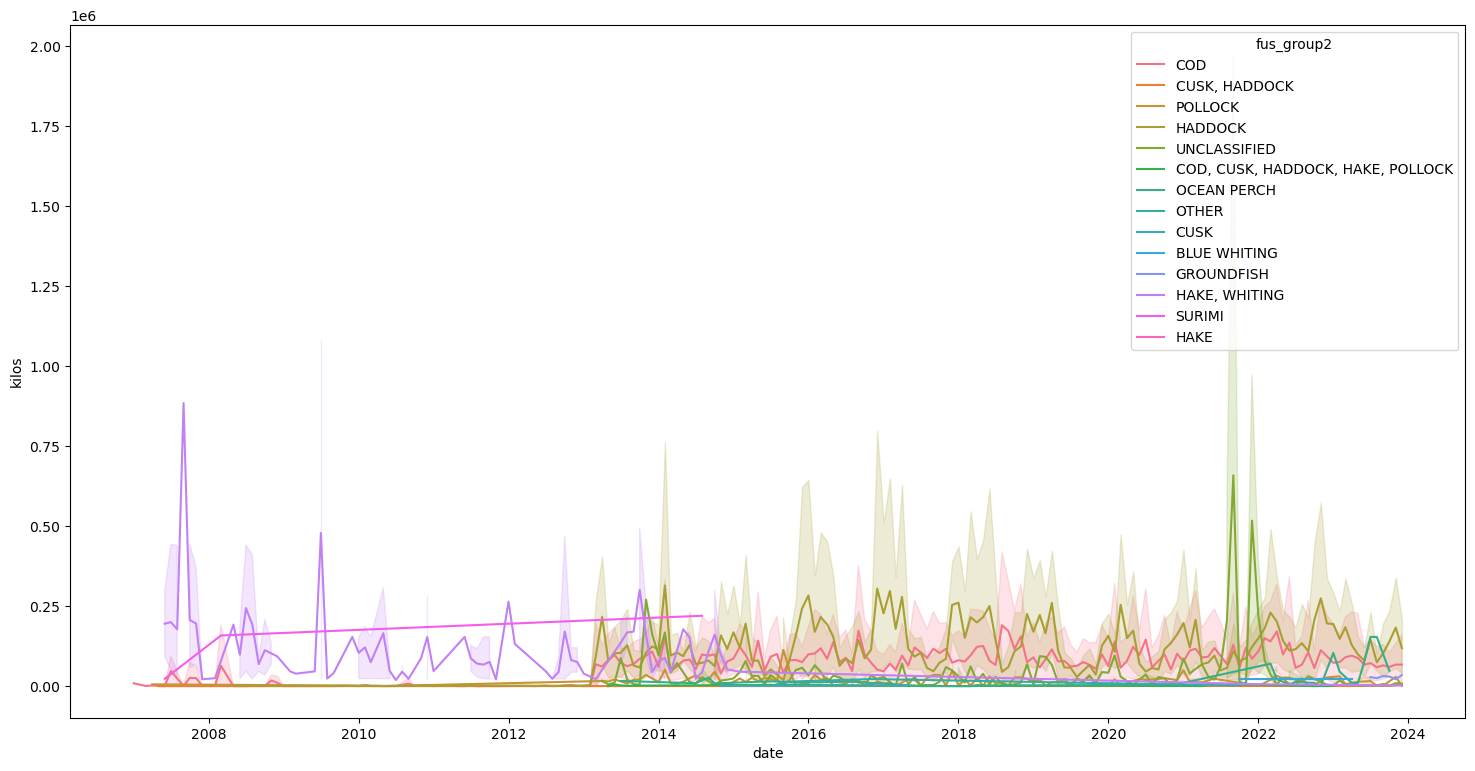

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,9))
sns.lineplot(data=df, x='date', y='kilos', hue='fus_group2', legend=True);

In [10]:
# Save the DataFrame to a CSV file
df.to_csv('../../data/noaa_2006-2024.csv', index=True)